##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Running TFLite models

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%201/Examples/TFLite_Week1_Linear_Regression.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%201/Examples/TFLite_Week1_Linear_Regression.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Setup

In [1]:
try:
    %tensorflow_version 2.x
except:
    pass

In [3]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.0.0


## Create a Basic Model of the Form y = mx + c

In [4]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 4s 745ms/sample - loss: 60.5806
Epoch 2/200
6/6 [==============================] - 0s 7ms/sample - loss: 48.0952
Epoch 3/200
6/6 [==============================] - 0s 12ms/sample - loss: 38.2633
Epoch 4/200
6/6 [==============================] - 0s 7ms/sample - loss: 30.5194
Epoch 5/200
6/6 [==============================] - 0s 8ms/sample - loss: 24.4183
Epoch 6/200
6/6 [==============================] - 0s 7ms/sample - loss: 19.6099
Epoch 7/200
6/6 [==============================] - 0s 8ms/sample - loss: 15.8187
Epoch 8/200
6/6 [==============================] - 0s 7ms/sample - loss: 12.8280
Epoch 9/200
6/6 [==============================] - 0s 9ms/sample - loss: 10.4671
Epoch 10/200
6/6 [==============================] - 0s 9ms/sample - loss: 8.6020
Epoch 11/200
6/6 [==============================] - 0s 7ms/sample - loss: 7.1271
Epoch 12/200
6/6 [==============================] - 0s 8ms/sample - loss: 5.9594
Epoch 

Epoch 102/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2764
Epoch 103/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2707
Epoch 104/200
6/6 [==============================] - 0s 8ms/sample - loss: 0.2651
Epoch 105/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2597
Epoch 106/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2544
Epoch 107/200
6/6 [==============================] - 0s 4ms/sample - loss: 0.2491
Epoch 108/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2440
Epoch 109/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2390
Epoch 110/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2341
Epoch 111/200
6/6 [==============================] - 0s 5ms/sample - loss: 0.2293
Epoch 112/200
6/6 [==============================] - 0s 4ms/sample - loss: 0.2246
Epoch 113/200
6/6 [==============================] - 0s 4ms/sample - loss: 0.2200
Epoch 114/200
6/

## Generate a SavedModel

In [10]:
export_dir = 'saved_model'
tf.saved_model.save(model, export_dir)
#pathlib.Path.cwd()

INFO:tensorflow:Assets written to: saved_model\assets


## Convert the SavedModel to TFLite

In [11]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [13]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

## Initialize the TFLite Interpreter To Try It Out

In [18]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'Identity', 'index': 0, 'shape': array([1, 1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [19]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])
    
print(inputs)

[0.071680784, 0.18053594, 0.9078884, 0.50084037, 0.42474756, 0.28894213, 0.60300237, 0.6653398, 0.25016835, 0.39853734, 0.086739115, 0.054866157, 0.51528746, 0.72843796, 0.66405463, 0.522346, 0.93201935, 0.54181397, 0.61582005, 0.16923776, 0.16546144, 0.68217206, 0.65584236, 0.12049255, 0.9905756, 0.41282305, 0.41737294, 0.91275924, 0.07628434, 0.7163085, 0.98206025, 0.50898594, 0.45607096, 0.87349147, 0.17427158, 0.2876311, 0.71331453, 0.9378127, 0.5225701, 0.006687489, 0.6940235, 0.8126579, 0.3175277, 0.1325727, 0.17322156, 0.23495826, 0.8221814, 0.8473077, 0.85739124, 0.66211396, 0.8169742, 0.61213505, 0.73632413, 0.98208326, 0.5907546, 0.1536302, 0.7031909, 0.562397, 0.45241496, 0.3991708, 0.94167095, 0.5996996, 0.12812735, 0.4500031, 0.8264181, 0.44775277, 0.43597138, 0.7681229, 0.89001936, 0.06116662, 0.13439986, 0.81643057, 0.5982022, 0.6947724, 0.011245213, 0.78314346, 0.41331658, 0.90068257, 0.29117408, 0.30454096, 0.20045754, 0.52030873, 0.076960914, 0.30575132, 0.75583524, 0

## Visualize the Model

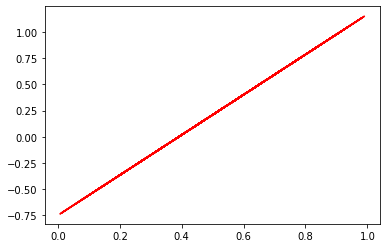

In [20]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk. 

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass